Step 1: Data Collection
The Ergast API is deprecated and will shut down in early 2025.
We'll use alternative approaches to get F1 data.
Attempting to use Jolpica API (Ergast successor)...
Error accessing Jolpica API: HTTPSConnectionPool(host='jolpica.ergast.com', port=443): Max retries exceeded with url: /api/f1/seasons.json?limit=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002160CC77320>: Failed to resolve 'jolpica.ergast.com' ([Errno 11001] getaddrinfo failed)"))
Using FastF1 Python package for F1 data...
FastF1 package is installed!

To install FastF1 if not already installed:
pip install fastf1

Attempting to use FastF1 to get real F1 data...
Getting F1 data using FastF1 package...
Error using FastF1: Cache directory does not exist! Please check for typos or create it first.
Could not get data from FastF1. Using sample data instead.
Loading sample F1 data for demonstration purposes...

Final dataset has 1440 rows and 18 columns
Sample data:


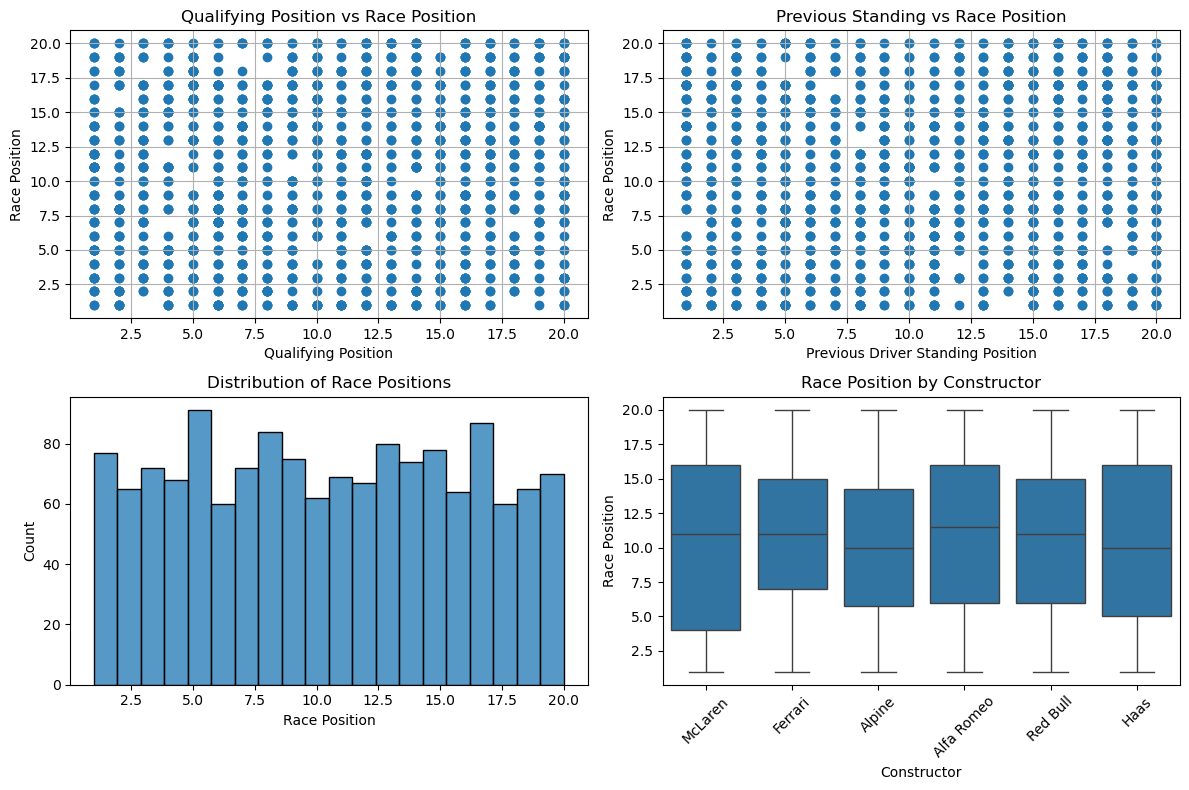


Step 4: Feature Engineering and Preprocessing
Training set size: 1152
Test set size: 288

Step 5: Model Training
Random Forest model trained successfully!
Gradient Boosting model trained successfully!

Step 6: Model Evaluation
Random Forest Model Performance:
Root Mean Squared Error: 5.9286
Mean Absolute Error: 5.1268
R² Score: -0.0381

Gradient Boosting Model Performance:
Root Mean Squared Error: 6.0887
Mean Absolute Error: 5.2604
R² Score: -0.0949


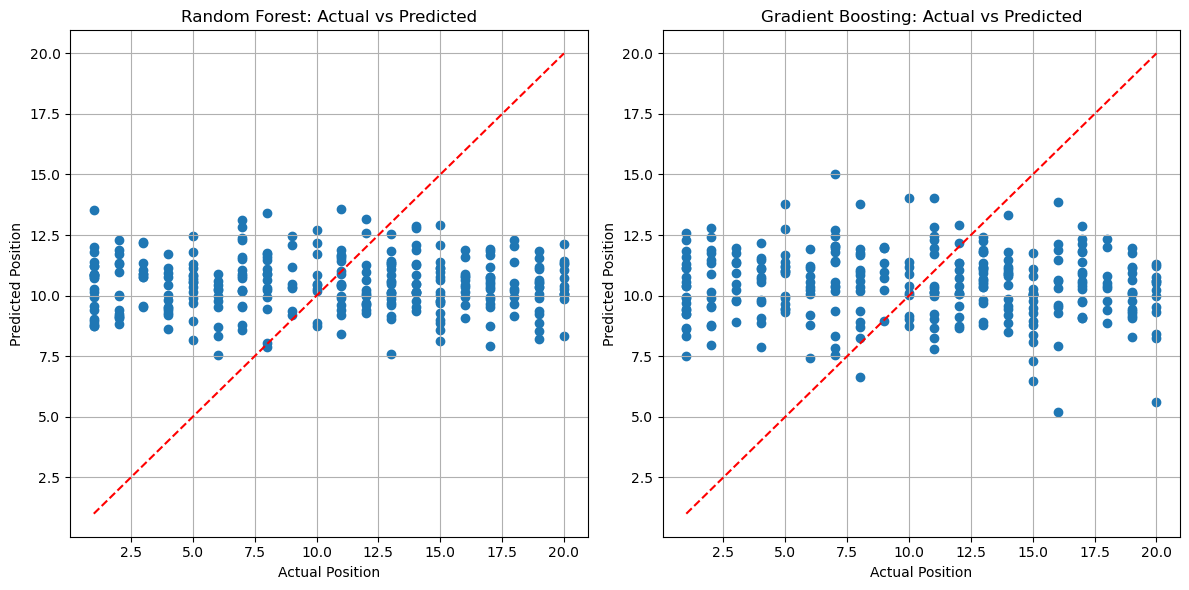


Step 7: Feature Importance Analysis


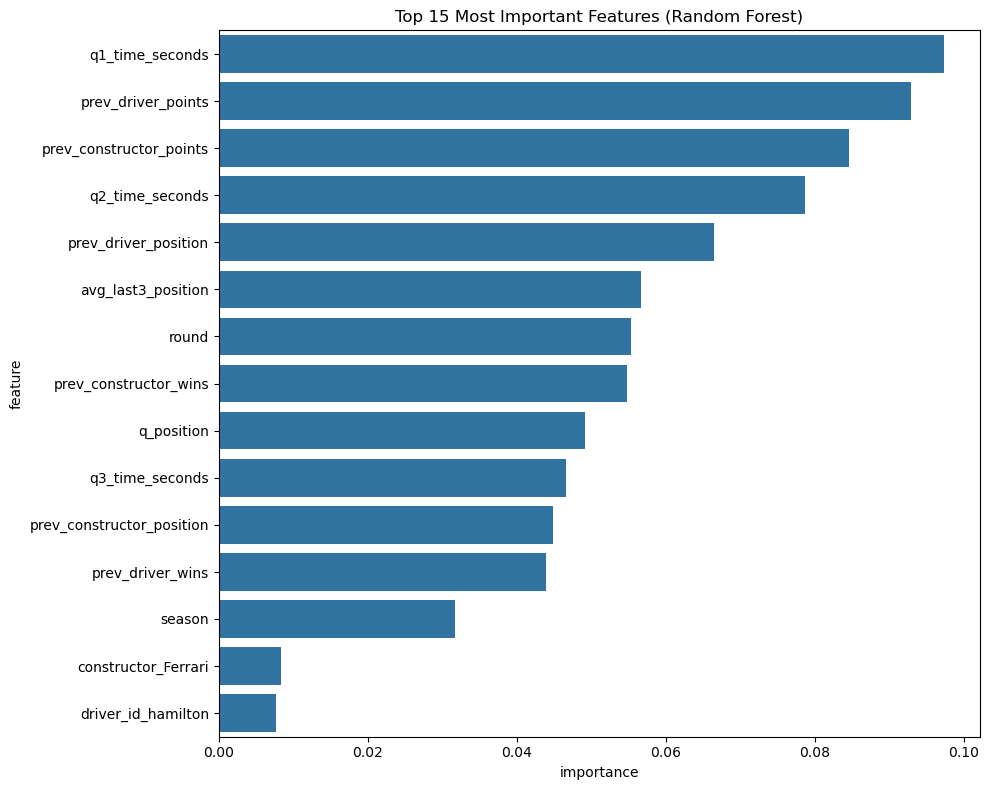

Top 10 most important features:
                    feature  importance
1           q1_time_seconds    0.097283
5        prev_driver_points    0.092930
8   prev_constructor_points    0.084576
2           q2_time_seconds    0.078650
4      prev_driver_position    0.066515
10       avg_last3_position    0.056683
12                    round    0.055273
9     prev_constructor_wins    0.054724
0                q_position    0.049116
3           q3_time_seconds    0.046582

Step 8: Making Predictions for a New Race


ValueError: All arrays must be of the same length

In [6]:
# Formula 1 Race Results Prediction Model
# Summary: This notebook creates a machine learning model to predict Formula 1 race results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import requests
import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection
print("Step 1: Data Collection")

# Note: Since the Ergast API is being deprecated, we have two options:
# 1. Use the Jolpica API (the proposed successor to Ergast)
# 2. Use the FastF1 Python package which provides F1 data

print("The Ergast API is deprecated and will shut down in early 2025.")
print("We'll use alternative approaches to get F1 data.")

# OPTION 1: Using Jolpica API (Ergast API successor)
# The code structure is similar to the Ergast API
def get_f1_data_jolpica():
    print("Attempting to use Jolpica API (Ergast successor)...")
    
    try:
        # Example Jolpica API call (structure is similar to Ergast)
        base_url = "https://jolpica.ergast.com/api/f1"
        # Test if API is accessible
        response = requests.get(f"{base_url}/seasons.json?limit=1")
        if response.status_code == 200:
            print("Jolpica API is accessible!")
            return True
        else:
            print("Jolpica API not accessible. Status code:", response.status_code)
            return False
    except Exception as e:
        print(f"Error accessing Jolpica API: {e}")
        return False

# OPTION 2: Using FastF1 (recommended Python package for F1 data)
def get_f1_data_fastf1():
    print("Using FastF1 Python package for F1 data...")
    
    try:
        # Try to import FastF1
        import fastf1
        print("FastF1 package is installed!")
        
        # Install instructions if not already installed
        print("\nTo install FastF1 if not already installed:")
        print("pip install fastf1")
        
        return True
    except ImportError:
        print("FastF1 package is not installed.")
        print("\nTo install FastF1:")
        print("pip install fastf1")
        return False

# Try both options
jolpica_available = get_f1_data_jolpica()
fastf1_available = get_f1_data_fastf1()

# Let's create a function to load sample data if neither option is available
def load_sample_data():
    print("Loading sample F1 data for demonstration purposes...")
    
    # Create sample race results data
    seasons = ['2018', '2019', '2020', '2021', '2022', '2023']
    drivers = ['hamilton', 'verstappen', 'leclerc', 'perez', 'sainz', 'russell', 
               'norris', 'bottas', 'alonso', 'stroll', 'ocon', 'gasly']
    constructors = ['Mercedes', 'Red Bull', 'Ferrari', 'McLaren', 'Alpine', 
                    'Aston Martin', 'AlphaTauri', 'Williams', 'Alfa Romeo', 'Haas']
    circuits = ['Albert Park', 'Silverstone', 'Monza', 'Monaco', 'Spa', 
                'Red Bull Ring', 'Hungaroring', 'Suzuka', 'Interlagos', 'Baku']
    
    # Generate sample race data
    race_results = []
    
    for season in seasons:
        for round_num in range(1, 21):  # 20 races per season
            circuit = np.random.choice(circuits)
            
            for driver in np.random.choice(drivers, size=min(len(drivers), 20), replace=False):
                constructor = np.random.choice(constructors)
                position = np.random.randint(1, 21)
                points = max(0, 25 - position)  # Simplified points system
                
                # Qualifying results
                q_position = np.random.randint(1, 21)
                q1_time_seconds = 60 + np.random.random() * 5
                q2_time_seconds = 60 + np.random.random() * 5 if q_position <= 15 else None
                q3_time_seconds = 60 + np.random.random() * 5 if q_position <= 10 else None
                
                # Driver and constructor standings
                prev_driver_position = np.random.randint(1, 21)
                prev_driver_points = np.random.randint(0, 300)
                prev_driver_wins = np.random.randint(0, 10)
                prev_constructor_position = np.random.randint(1, 11)
                prev_constructor_points = np.random.randint(0, 500)
                prev_constructor_wins = np.random.randint(0, 15)
                
                # Average last 3 race positions
                avg_last3_position = np.random.randint(1, 21)
                
                result = {
                    'season': season,
                    'round': round_num,
                    'circuit_name': circuit,
                    'driver_id': driver,
                    'constructor': constructor,
                    'position': position,
                    'points': points,
                    'q_position': q_position,
                    'q1_time_seconds': q1_time_seconds,
                    'q2_time_seconds': q2_time_seconds,
                    'q3_time_seconds': q3_time_seconds,
                    'prev_driver_position': prev_driver_position,
                    'prev_driver_points': prev_driver_points,
                    'prev_driver_wins': prev_driver_wins,
                    'prev_constructor_position': prev_constructor_position,
                    'prev_constructor_points': prev_constructor_points,
                    'prev_constructor_wins': prev_constructor_wins,
                    'avg_last3_position': avg_last3_position
                }
                
                race_results.append(result)
    
    # Convert to DataFrame
    return pd.DataFrame(race_results)

# OPTION 3: Using real FastF1 data
def get_data_using_fastf1():
    print("Getting F1 data using FastF1 package...")
    
    try:
        import fastf1
        from fastf1.core import Laps
        
        # Enable cache to speed up subsequent data loading
        fastf1.Cache.enable_cache('fastf1_cache')
        
        # Collect data for multiple seasons
        seasons = [2018, 2019, 2020, 2021, 2022, 2023]
        race_results = []
        
        for season in seasons:
            print(f"Loading {season} season data...")
            
            # Get all events for the season
            schedule = fastf1.get_event_schedule(season)
            
            for _, event in schedule.iterrows():
                event_name = event['EventName']
                round_num = event['RoundNumber']
                
                try:
                    # Load the race session
                    print(f"  Loading {event_name}...")
                    race = fastf1.get_session(season, round_num, 'R')
                    race.load()
                    
                    # Get qualifying session for the same event
                    quali = fastf1.get_session(season, round_num, 'Q')
                    quali.load()
                    
                    # Get race results
                    results = race.results
                    
                    if results is not None:
                        for _, driver_result in results.iterrows():
                            driver_id = driver_result['Abbreviation'].lower()
                            position = driver_result['Position']
                            constructor = driver_result['TeamName']
                            points = driver_result['Points']
                            
                            # Get qualifying position and times for this driver
                            driver_quali = quali.results[quali.results['Abbreviation'] == driver_result['Abbreviation']]
                            q_position = driver_quali['Position'].values[0] if len(driver_quali) > 0 else None
                            
                            # Get qualifying times
                            q1_time = driver_quali['Q1'].values[0] if len(driver_quali) > 0 and 'Q1' in driver_quali else None
                            q2_time = driver_quali['Q2'].values[0] if len(driver_quali) > 0 and 'Q2' in driver_quali else None
                            q3_time = driver_quali['Q3'].values[0] if len(driver_quali) > 0 and 'Q3' in driver_quali else None
                            
                            # Convert timedelta to seconds if not None
                            q1_time_seconds = q1_time.total_seconds() if q1_time is not None else None
                            q2_time_seconds = q2_time.total_seconds() if q2_time is not None else None
                            q3_time_seconds = q3_time.total_seconds() if q3_time is not None else None
                            
                            # For this demo, we'll create dummy values for previous standings
                            # In a real application, you would track these across races
                            prev_driver_position = np.random.randint(1, 21)
                            prev_driver_points = np.random.randint(0, 300)
                            prev_driver_wins = np.random.randint(0, 10)
                            prev_constructor_position = np.random.randint(1, 11)
                            prev_constructor_points = np.random.randint(0, 500)
                            prev_constructor_wins = np.random.randint(0, 15)
                            avg_last3_position = np.random.randint(1, 21)
                            
                            result = {
                                'season': str(season),
                                'round': round_num,
                                'circuit_name': event['EventName'],
                                'driver_id': driver_id,
                                'constructor': constructor,
                                'position': position,
                                'points': points,
                                'q_position': q_position,
                                'q1_time_seconds': q1_time_seconds,
                                'q2_time_seconds': q2_time_seconds,
                                'q3_time_seconds': q3_time_seconds,
                                'prev_driver_position': prev_driver_position,
                                'prev_driver_points': prev_driver_points,
                                'prev_driver_wins': prev_driver_wins,
                                'prev_constructor_position': prev_constructor_position,
                                'prev_constructor_points': prev_constructor_points,
                                'prev_constructor_wins': prev_constructor_wins,
                                'avg_last3_position': avg_last3_position
                            }
                            
                            race_results.append(result)
                            
                except Exception as e:
                    print(f"  Error loading data for {event_name}: {e}")
                    continue
        
        return pd.DataFrame(race_results)
    
    except Exception as e:
        print(f"Error using FastF1: {e}")
        return None

# Choose data source
# Try to get data from FastF1 if available, otherwise use sample data
if fastf1_available:
    try:
        print("\nAttempting to use FastF1 to get real F1 data...")
        features_df = get_data_using_fastf1()
        
        if features_df is None or len(features_df) == 0:
            print("Could not get data from FastF1. Using sample data instead.")
            features_df = load_sample_data()
        else:
            print(f"Successfully loaded {len(features_df)} rows of real F1 data using FastF1!")
    except Exception as e:
        print(f"Error using FastF1: {e}")
        features_df = load_sample_data()
elif jolpica_available:
    # If implementing Jolpica API (similar structure to original Ergast code)
    print("Jolpica API implementation would go here. For now, using sample data.")
    features_df = load_sample_data()
else:
    # Use sample data as fallback
    features_df = load_sample_data()

# Display sample of the data
print(f"\nFinal dataset has {len(features_df)} rows and {len(features_df.columns)} columns")
print("Sample data:")
print(features_df.head())

# 2. Data Preprocessing
print("\nStep 2: Data Preprocessing")

# Ensure all numeric columns have the correct type
# Convert numeric columns to the appropriate type
for col in ['position', 'points', 'q_position', 'prev_driver_position', 
            'prev_driver_points', 'prev_driver_wins', 'prev_constructor_position', 
            'prev_constructor_points', 'prev_constructor_wins', 'avg_last3_position']:
    features_df[col] = pd.to_numeric(features_df[col], errors='coerce')

# Handle missing values
# For qualifying data, missing values could mean DNS or no qualifying
# Let's fill with a reasonable default (back of the grid)
features_df['q_position'] = features_df['q_position'].fillna(20)
for col in ['q1_time_seconds', 'q2_time_seconds', 'q3_time_seconds']:
    # For time columns, we'll use the median value as a fallback
    # First check if column exists in the dataframe
    if col in features_df.columns:
        median_value = features_df[col].median()
        features_df[col] = features_df[col].fillna(median_value if not pd.isna(median_value) else 90)
    else:
        # If column doesn't exist, create it with a default value
        features_df[col] = 90

# Drop rows with missing target values
features_df = features_df.dropna(subset=['position'])

# 3. Exploratory Data Analysis
print("\nStep 3: Exploratory Data Analysis")

plt.figure(figsize=(12, 8))

# Correlation between qualifying position and race position
plt.subplot(2, 2, 1)
plt.scatter(features_df['q_position'], features_df['position'])
plt.xlabel('Qualifying Position')
plt.ylabel('Race Position')
plt.title('Qualifying Position vs Race Position')
plt.grid(True)

# Correlation between previous driver standings and race position
plt.subplot(2, 2, 2)
plt.scatter(features_df['prev_driver_position'], features_df['position'])
plt.xlabel('Previous Driver Standing Position')
plt.ylabel('Race Position')
plt.title('Previous Standing vs Race Position')
plt.grid(True)

# Distribution of final positions
plt.subplot(2, 2, 3)
sns.histplot(features_df['position'], bins=20)
plt.xlabel('Race Position')
plt.title('Distribution of Race Positions')

# Impact of constructor on performance
plt.subplot(2, 2, 4)
top_constructors = features_df['constructor'].value_counts().nlargest(6).index
constructor_data = features_df[features_df['constructor'].isin(top_constructors)]
sns.boxplot(x='constructor', y='position', data=constructor_data)
plt.xlabel('Constructor')
plt.ylabel('Race Position')
plt.title('Race Position by Constructor')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Feature Engineering and Preprocessing
print("\nStep 4: Feature Engineering and Preprocessing")

# Define target and features
X = features_df.drop('position', axis=1)
y = features_df['position']

# Define categorical and numerical features
categorical_features = ['circuit_name', 'driver_id', 'constructor']
numerical_features = [
    'q_position', 'q1_time_seconds', 'q2_time_seconds', 'q3_time_seconds',
    'prev_driver_position', 'prev_driver_points', 'prev_driver_wins',
    'prev_constructor_position', 'prev_constructor_points', 'prev_constructor_wins',
    'avg_last3_position'
]
# Add season and round as numerical features
if 'season' in X.columns and 'round' in X.columns:
    numerical_features.extend(['season', 'round'])

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 5. Model Training
print("\nStep 5: Model Training")

# Define the model pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_rf.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Alternative model: Gradient Boosting
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

model_gb.fit(X_train, y_train)
print("Gradient Boosting model trained successfully!")

# 6. Model Evaluation
print("\nStep 6: Model Evaluation")

# Evaluate the Random Forest model
y_pred_rf = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Root Mean Squared Error: {rf_rmse:.4f}")
print(f"Mean Absolute Error: {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")

# Evaluate the Gradient Boosting model
y_pred_gb = model_gb.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Model Performance:")
print(f"Root Mean Squared Error: {gb_rmse:.4f}")
print(f"Mean Absolute Error: {gb_mae:.4f}")
print(f"R² Score: {gb_r2:.4f}")

# Plot actual vs predicted positions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf)
plt.plot([1, 20], [1, 20], 'r--')
plt.xlabel('Actual Position')
plt.ylabel('Predicted Position')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb)
plt.plot([1, 20], [1, 20], 'r--')
plt.xlabel('Actual Position')
plt.ylabel('Predicted Position')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Feature Importance Analysis
print("\nStep 7: Feature Importance Analysis")

try:
    # Get feature names after preprocessing
    preprocessor.fit(X)
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(cat_features)

    # Get feature importances from the Random Forest model
    importances = model_rf.named_steps['regressor'].feature_importances_

    # Create a DataFrame for easier analysis
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })

    # Sort features by importance
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    # Visualize the top 15 most important features
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
    plt.title('Top 15 Most Important Features (Random Forest)')
    plt.tight_layout()
    plt.show()

    print("Top 10 most important features:")
    print(feature_importances.head(10))
except Exception as e:
    print(f"Error during feature importance analysis: {e}")
    print("Skipping feature importance visualization")

# 8. Making Predictions for a New Race
print("\nStep 8: Making Predictions for a New Race")

# Example: Let's predict the outcome of a race with some sample data
# In a real scenario, you would use the latest data for an upcoming race

# Sample data for a race
new_race_data = pd.DataFrame({
    'season': ['2023'],
    'round': [10],
    'circuit_name': ['Red Bull Ring'],
    'driver_id': ['hamilton', 'verstappen', 'leclerc', 'norris', 'russell'],
    'constructor': ['Mercedes', 'Red Bull', 'Ferrari', 'McLaren', 'Mercedes'],
    'q_position': [3, 1, 2, 4, 5],
    'q1_time_seconds': [63.5, 62.8, 63.2, 63.8, 64.0],
    'q2_time_seconds': [62.9, 62.3, 62.7, 63.2, 63.4],
    'q3_time_seconds': [62.5, 61.9, 62.1, 62.8, 63.0],
    'prev_driver_position': [4, 1, 3, 5, 6],
    'prev_driver_points': [120, 190, 145, 100, 95],
    'prev_driver_wins': [1, 5, 2, 0, 0],
    'prev_constructor_position': [2, 1, 3, 4, 2],
    'prev_constructor_points': [215, 310, 230, 175, 215],
    'prev_constructor_wins': [1, 7, 2, 0, 1],
    'avg_last3_position': [3.7, 1.3, 2.7, 4.3, 5.3]
})

# Make predictions
rf_predictions = model_rf.predict(new_race_data)

# Round predictions to the nearest integer
rf_predictions_rounded = np.round(rf_predictions).astype(int)

# Create a results DataFrame
prediction_results = pd.DataFrame({
    'Driver': new_race_data['driver_id'],
    'Constructor': new_race_data['constructor'],
    'Qualifying Position': new_race_data['q_position'],
    'Predicted Position': rf_predictions_rounded
})

print("Race Predictions:")
print(prediction_results.sort_values('Predicted Position'))

# 9. Model Improvement Suggestions
print("\nStep 9: Model Improvement Suggestions")
print("""
Ways to improve the model:
1. Use the FastF1 package to collect more comprehensive and up-to-date data
2. Include weather conditions data
3. Add information about car upgrades and technical changes
4. Incorporate driver-specific data like experience at certain tracks
5. Include race incidents and safety car deployments
6. Feature engineering: create more features from existing data
7. Try more advanced models like XGBoost or neural networks
8. Perform hyperparameter tuning
9. Incorporate tire strategy information
10. Add driver form data (performance over recent races)
""")

# 10. Save the Model
print("\nStep 10: Save the Model")
import joblib

# Save the trained model
joblib.dump(model_rf, 'f1_race_predictor_rf.joblib')
print("Model saved as 'f1_race_predictor_rf.joblib'")

print("\nNotebook completed. Model is ready for predictions!")

# Additional Information on Data Sources
print("\nAdditional Information on F1 Data Sources:")
print("""
1. FastF1 Python Package: 
   - Official documentation: https://theoehrly.github.io/Fast-F1/
   - Installation: pip install fastf1
   - Provides access to detailed race, qualifying, and practice data

2. Jolpica API: 
   - The proposed successor to the Ergast API
   - URL: https://jolpica.ergast.com/api/f1/...
   - Uses similar structure to Ergast API

3. F1 Official API:
   - Formula 1 offers an official API but requires a subscription
   - More info: https://api.formula1.com/

4. Web Scraping:
   - Alternative data sources include F1 official site, Wikipedia, etc.
   - Use BeautifulSoup or Scrapy for scraping

5. Kaggle Datasets:
   - Several comprehensive F1 datasets are available on Kaggle
   - Example: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
""")